<a href="https://colab.research.google.com/github/Athira-M-Chandran/Deep-Learning/blob/main/POC_for_conv_and_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://slides.com/supremecommander/cnn-architecture/fullscreen

In [4]:
import os


In [5]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

In [10]:
def read_img(path,grayscale = True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap = 'gray')
    return img

  try:
    cv2.imshow("display",img) # this is work in local pc
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # this for google colab
    cv2_imshow(img)
    return img

In [13]:
img_path = 'car1.jpeg'

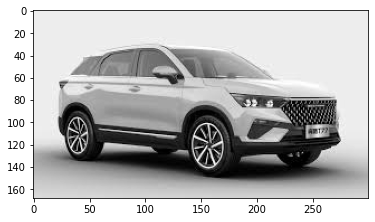

In [16]:
car = read_img(path=img_path,grayscale = True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



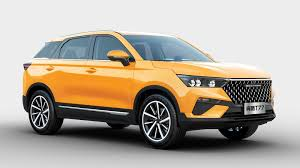

In [17]:
color_car = read_img(path=img_path,grayscale = False)

In [18]:
car.shape

(168, 300)

In [19]:
color_car.shape

(168, 300, 3)

# Apply a single convolution layer

In [20]:
row,col= car.shape
batch = 1 # as single image is there
ch = 1 # grayscale
reshaped_car_img = car.reshape(batch,row,col,ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [21]:
input_shape= reshaped_car_img.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters =1,kernel_size =(3,3),strides = (1,1),input_shape =input_shape )
]
conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [23]:
3*3 + 1
 # 3 - kernel size(weights) # 1- stride

10

In [24]:
# output shape
out = conv_model.predict(reshaped_car_img)

1/1 [==============================] - 7s 7s/step


In [25]:
out.shape

(1, 166, 298, 1)

In [26]:
# w2 = (w1-F +2P)//S +1

168-3+2*0//1 +1

166

In [27]:
# H2 = (H1-F +2P)//S +1

300-3+2*0//1 +1

298

TypeError: ignored

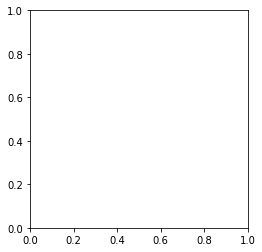

In [28]:
plt.imshow(out,cmap = "gray")

In [30]:
row,col= out.shape[1:-1]
row,col

(166, 298)

In [31]:
_,row,col,_=out.shape
row,col

(166, 298)

In [32]:
reshape_out = out.reshape(row,col)
reshape_out.shape

(166, 298)

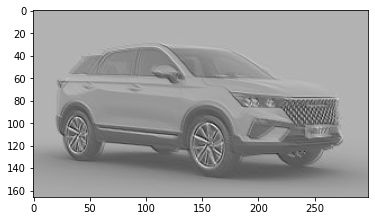

In [33]:
plt.imshow(reshape_out,cmap="gray")

> -For color Image

In [34]:
color_car.shape

(168, 300, 3)

In [35]:
# (l,r,c,ch)
row,col,ch = color_car.shape
color_car_reshaped = color_car.reshape(1,row,col,ch)
color_car_reshaped.shape



(1, 168, 300, 3)

In [43]:
input_shape= color_car_reshaped.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters =1,kernel_size =(3,3),strides = (1,1),input_shape =input_shape )
]
conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [37]:
3*3*3 +1

28

In [44]:
out = conv_model.predict(color_car_reshaped)

1/1 [==============================] - 0s 41ms/step


In [45]:
out.shape

(1, 166, 298, 1)

In [46]:
_,row,col,_ = out.shape
row,col

(166, 298)

In [47]:
reshape_out = out.reshape(row,col)
reshape_out.shape

(166, 298)

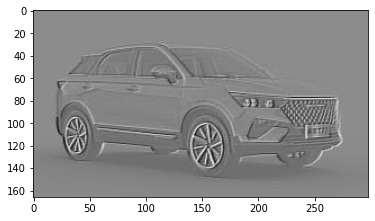

In [48]:
plt.imshow(reshape_out,cmap = "gray")

In [62]:
def reshaping_in(img,grayscale = True):
  if grayscale:
    row,col =img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  #else:
  row,col,ch=img.shape
  color_img = img.reshape(1,row,col,ch)
  return color_img

In [50]:
def get_conv_model(filters =1,kernel_size =(3,3),strides = (1,1),input_shape =None,padding = "valid"):
  #input_shape= color_car_reshaped.shape[1:]
  CONV_LAYER = [
      tf.keras.layers.Conv2D(
          filters =filters,
          kernel_size =kernel_size,
          strides = strides,
          input_shape =input_shape )
  ]
  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model


In [68]:
def apply_conv_model_and_visualize(img,conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _,row,col,channels = out.shape
    reshape_out = out.reshape(row,col,channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel],cmap = "gray")
      plt.show()
  except Exception as e:
      raise e
      

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



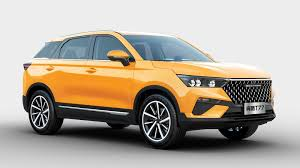

[[[[237 237 237]
   [237 237 237]
   [237 237 237]
   ...
   [237 237 237]
   [237 237 237]
   [237 237 237]]

  [[237 237 237]
   [237 237 237]
   [237 237 237]
   ...
   [237 237 237]
   [237 237 237]
   [237 237 237]]

  [[237 237 237]
   [237 237 237]
   [237 237 237]
   ...
   [237 237 237]
   [237 237 237]
   [237 237 237]]

  ...

  [[216 216 216]
   [216 216 216]
   [216 216 216]
   ...
   [211 211 211]
   [211 211 211]
   [211 211 211]]

  [[217 217 217]
   [217 217 217]
   [217 217 217]
   ...
   [213 213 213]
   [213 213 213]
   [213 213 213]]

  [[217 217 217]
   [217 217 217]
   [217 217 217]
   ...
   [214 214 214]
   [214 214 214]
   [214 214 214]]]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140


1/1 [==============================] - 0s 63ms/step
(1, 166, 298, 5)


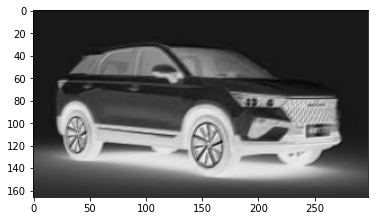

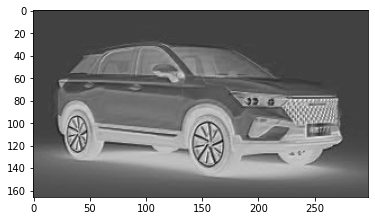

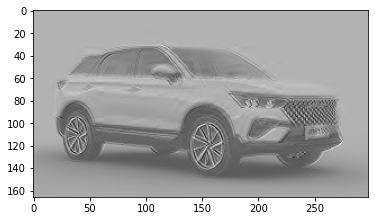

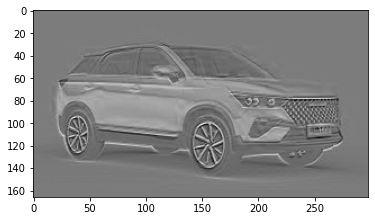

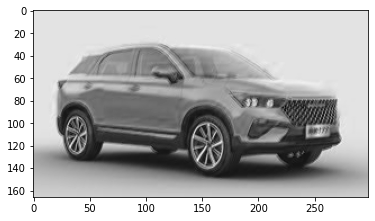

In [70]:
img = read_img(img_path,grayscale = False)
input_img = reshaping_in(img,grayscale = False)
print(input_img)
model = get_conv_model(filters =5,
                       kernel_size =(3,3),
                       strides = (1,1),
                       input_shape =input_img.shape[1:],
                       padding = "valid")
apply_conv_model_and_visualize(input_img,model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



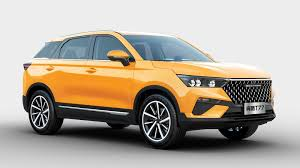

[[[[237 237 237]
   [237 237 237]
   [237 237 237]
   ...
   [237 237 237]
   [237 237 237]
   [237 237 237]]

  [[237 237 237]
   [237 237 237]
   [237 237 237]
   ...
   [237 237 237]
   [237 237 237]
   [237 237 237]]

  [[237 237 237]
   [237 237 237]
   [237 237 237]
   ...
   [237 237 237]
   [237 237 237]
   [237 237 237]]

  ...

  [[216 216 216]
   [216 216 216]
   [216 216 216]
   ...
   [211 211 211]
   [211 211 211]
   [211 211 211]]

  [[217 217 217]
   [217 217 217]
   [217 217 217]
   ...
   [213 213 213]
   [213 213 213]
   [213 213 213]]

  [[217 217 217]
   [217 217 217]
   [217 217 217]
   ...
   [214 214 214]
   [214 214 214]
   [214 214 214]]]]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140


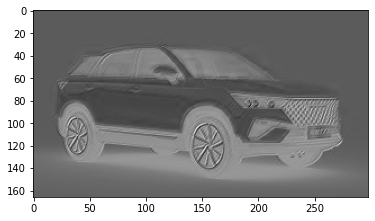

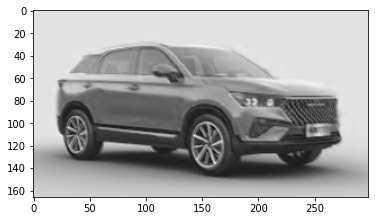

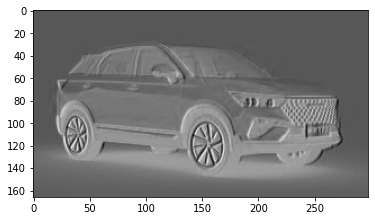

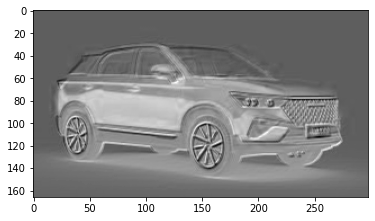

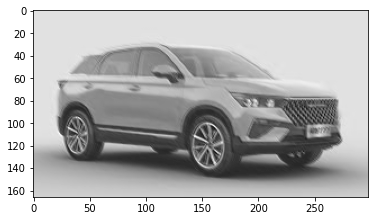

In [71]:
img = read_img(img_path,grayscale = False)
input_img = reshaping_in(img,grayscale = False)
print(input_img)
model = get_conv_model(filters =5,
                       kernel_size =(3,3),
                       strides = (1,1),
                       input_shape =input_img.shape[1:],
                       padding = "same")
apply_conv_model_and_visualize(input_img,model)

In [73]:
def max_pooling(img,pool_size=(2,2),strides = (2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size = pool_size,
                                           strides = strides)
  result = pooling_layer(reshaped_img)
  return result

(168, 300)


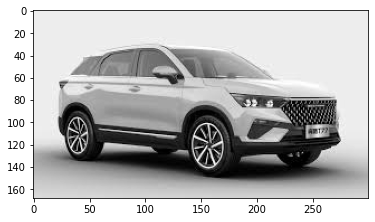

In [74]:
img = read_img(img_path)
print(img.shape)

In [75]:
result = max_pooling(img)
print(result.shape)

(1, 84, 150, 1)


In [76]:
(168-2)//2+1

84

In [77]:
(300-2)//2+1

150

In [82]:
def plot_pooling(result):
  _,row,col,_ = result.shape
  reshape_img = tf.reshape(result,(row,col))
  plt.imshow(reshape_img,cmap = "gray")

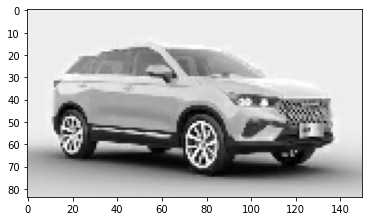

In [84]:
plot_pooling(result)

In [85]:
_,row,col,_ = result.shape
reshape = tf.reshape(result,(row,col))


In [86]:
result = max_pooling(reshape.numpy())

In [87]:
result.shape

TensorShape([1, 42, 75, 1])

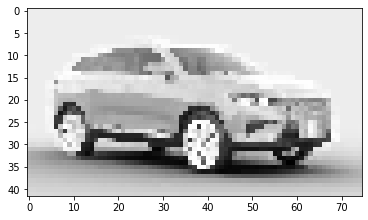

In [88]:
plot_pooling(result)